In [2]:
import numpy as np

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve , classification_report

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt


### **Data collection & Processing**

In [3]:
#Loading the dataset
from sklearn.datasets import load_breast_cancer
Breast_Cancer_datasets = load_breast_cancer()
X = Breast_Cancer_datasets.data
y = Breast_Cancer_datasets.target
feature_names = Breast_Cancer_datasets.feature_names

In [4]:
print(Breast_Cancer_datasets)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
# Generate pandas data frame in general
import pandas as pd
#loading the data on the data frame
df = pd.DataFrame(Breast_Cancer_datasets.data, columns = Breast_Cancer_datasets.feature_names)

In [6]:
df.to_excel('Breast_Cancer_datasets.xlsx', index=False)
from google.colab import files
files.download('Breast_Cancer_datasets.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
#print the first 5 rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
#adding the target column
df['diagnosis'] = Breast_Cancer_datasets.target

In [9]:
#print the last 5 rows
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [10]:
#print the count of the rows and columns
df.shape

(569, 31)

In [11]:
# viewing all the information, there is no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
# checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [13]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


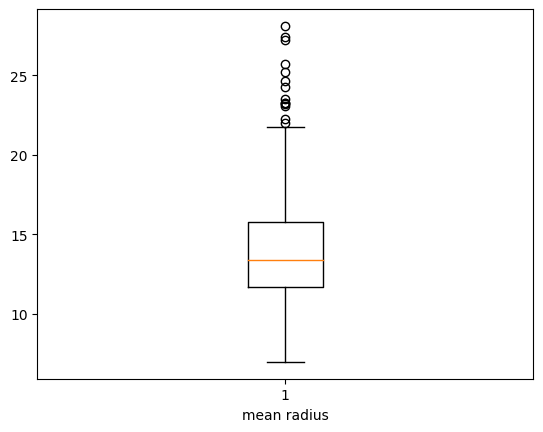

In [ ]:
plt.boxplot(df['mean radius'])
plt.xlabel('mean radius')
plt.show()

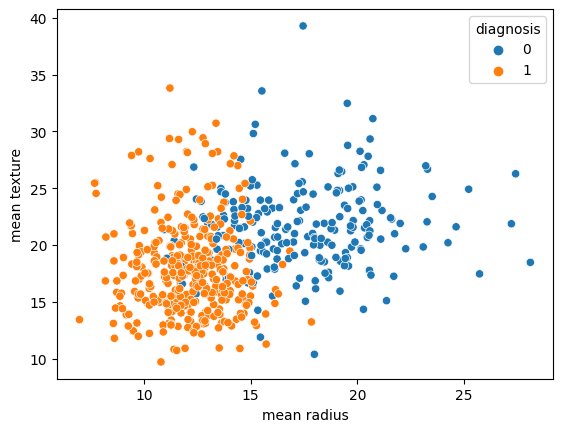

In [ ]:
import seaborn as sns
# Scatterplot
sns.scatterplot(x='mean radius', y='mean texture', hue='diagnosis', data=df)
plt.show()

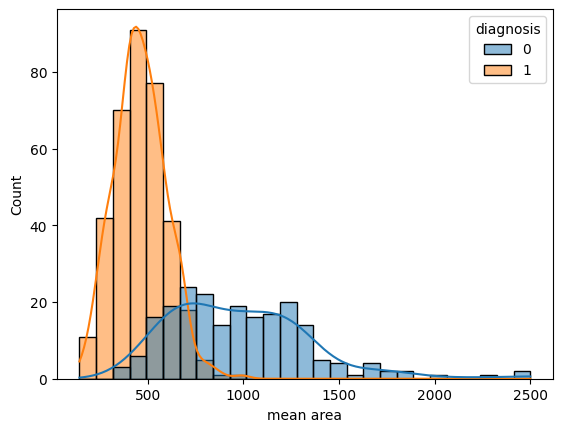

In [ ]:
# Histogram
sns.histplot(x='mean area', hue='diagnosis', data=df, kde=True)
plt.show()

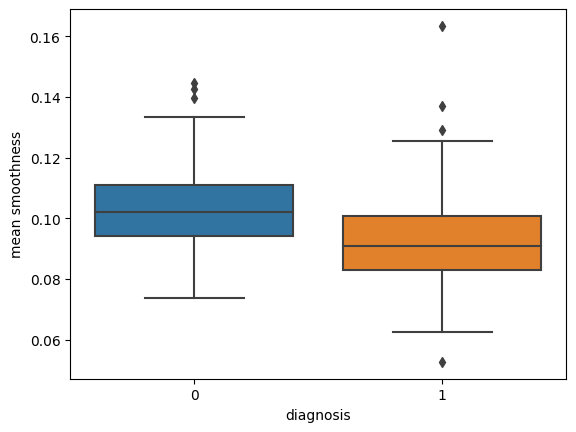

In [ ]:
# Boxplot
sns.boxplot(x='diagnosis', y='mean smoothness', data=df)
plt.show()

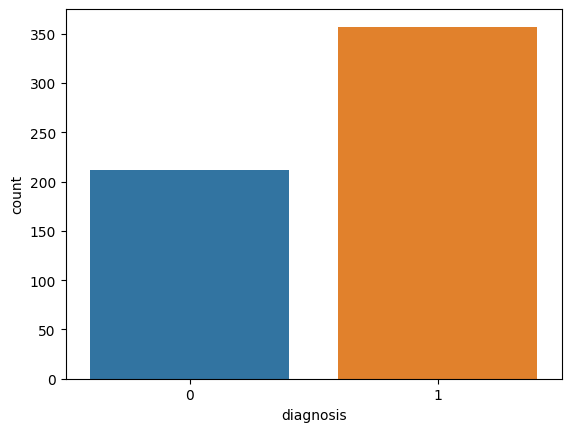

In [ ]:
# Bar chart
sns.countplot(x='diagnosis', data=df)
plt.show()

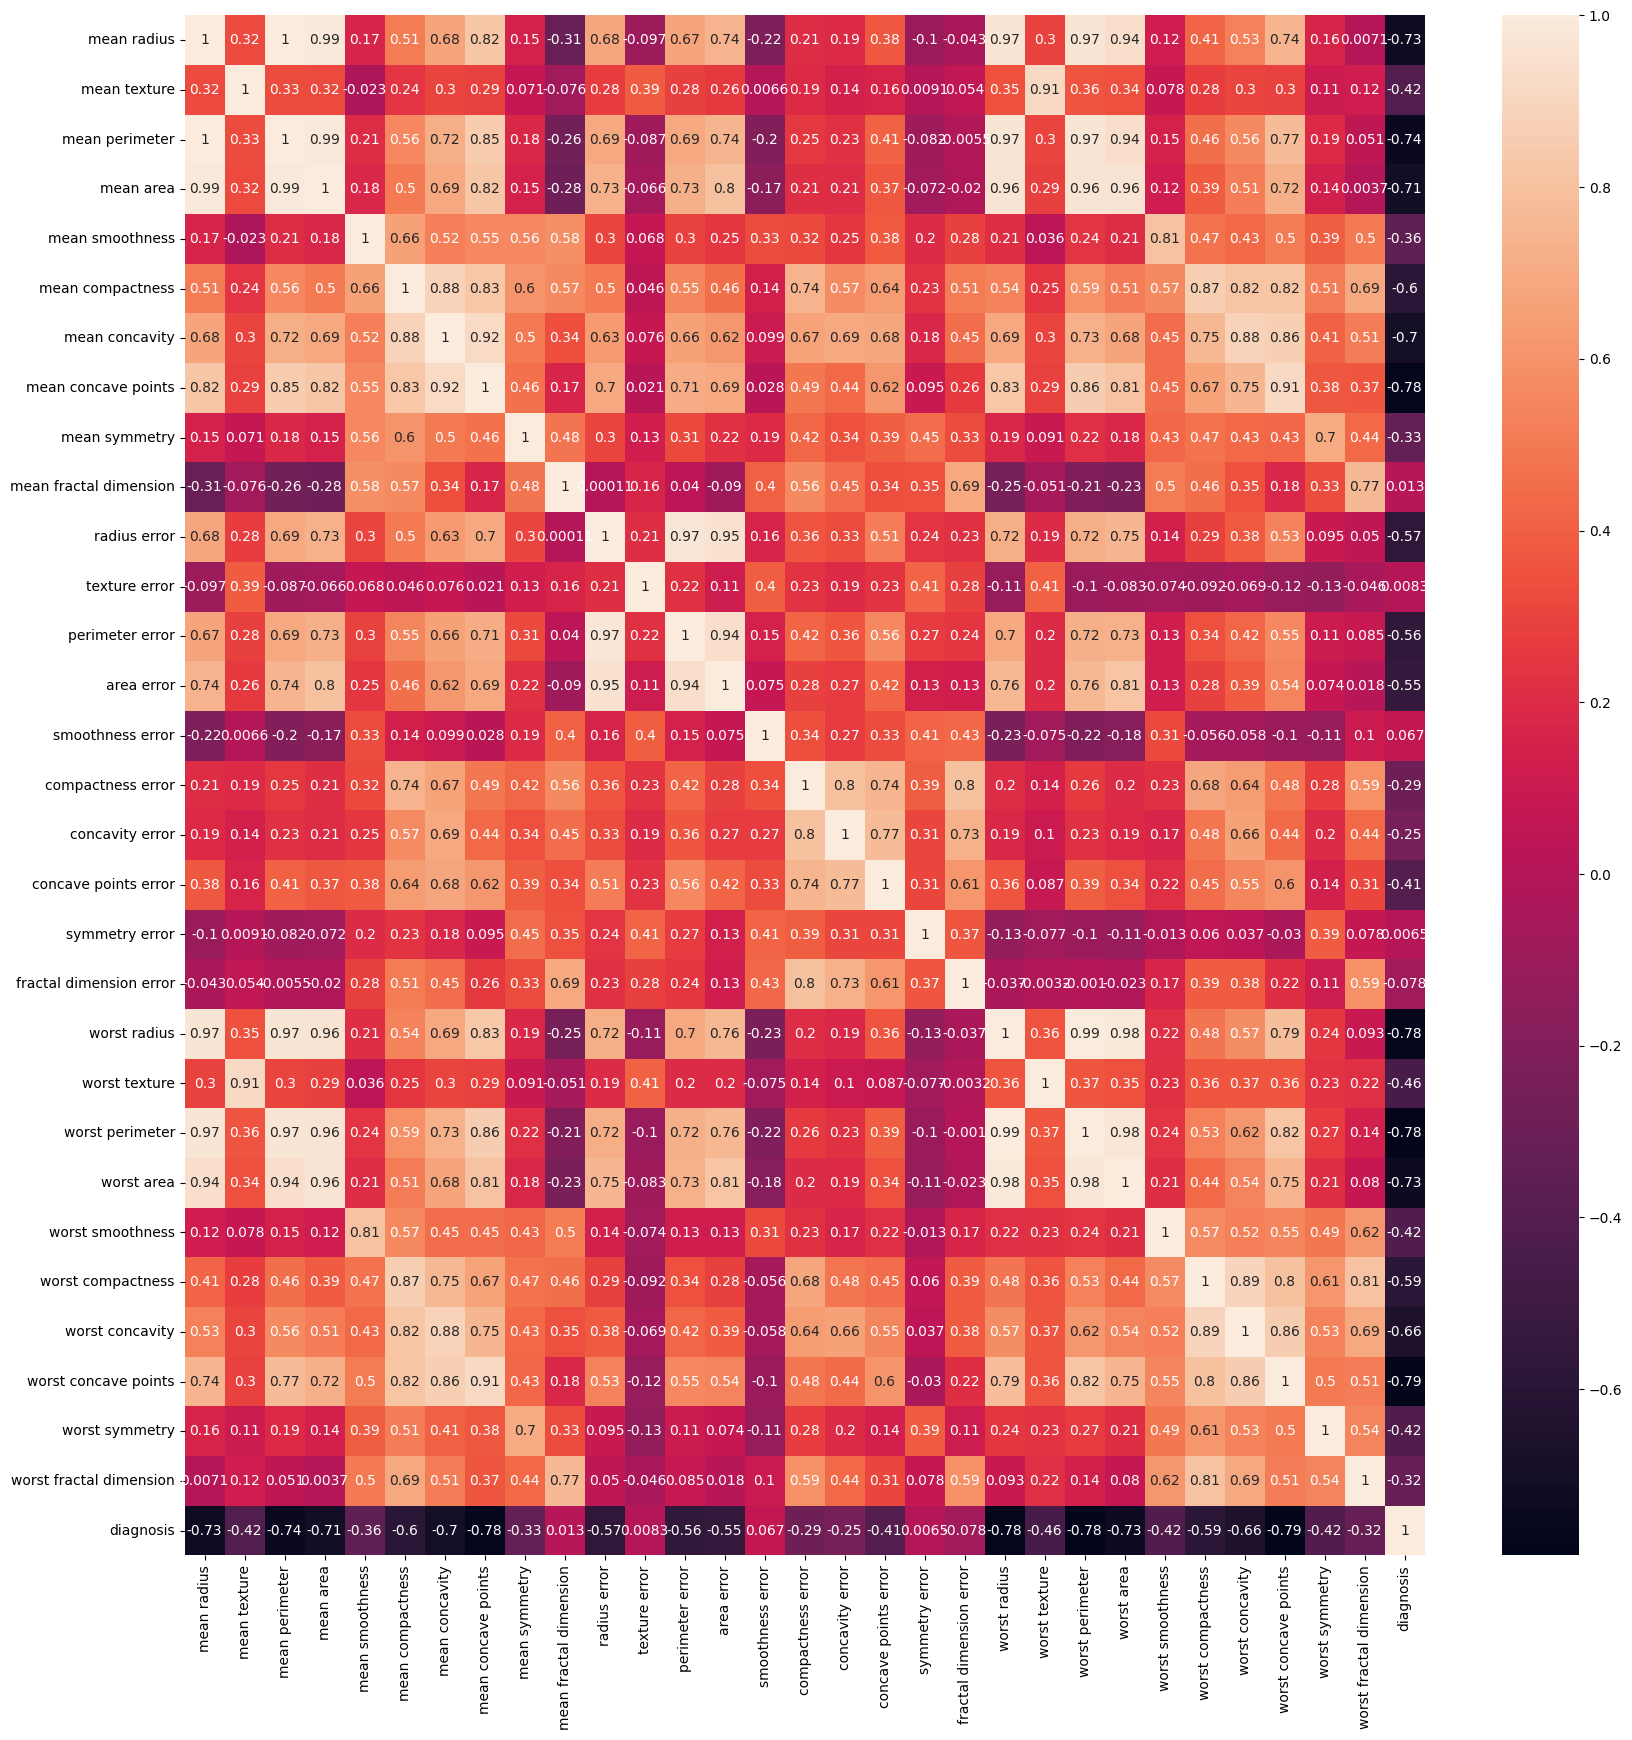

In [ ]:
# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.diagnosis.unique()

array([0, 1])

In [ ]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

**1 --> benign  / 0 --> Malignant**

In [ ]:
df.groupby('diagnosis').mean().T

diagnosis,0,1
mean radius,17.462830,12.146524
mean texture,21.604906,17.914762
mean perimeter,115.365377,78.075406
mean area,978.376415,462.790196
mean smoothness,0.102898,0.092478
mean compactness,0.145188,0.080085
mean concavity,0.160775,0.046058
mean concave points,0.087990,0.025717
mean symmetry,0.192909,0.174186
mean fractal dimension,0.062680,0.062867


In [ ]:
X=df.drop(columns='diagnosis', axis=1)
y=df['diagnosis']

In [ ]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


### **Train and test split**

In [ ]:
#split the dataset into train data and test data
from sklearn.model_selection import train_test_split
#20% for testing and 80 % for tranning
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### **scale** **the** **features**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')

In [ ]:
#training the modle
lr.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
# Make predictions on the test set
lr_y_pred_test = lr.predict(X_test)
lr_y_pred_train=lr.predict(X_train)

Logistic Regression Classifier :


Accuracy: 97.37


Precision: 98.53


Recall: 97.10


F1: 97.81


AUC score: 97.44
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.99      0.97      0.98        69

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



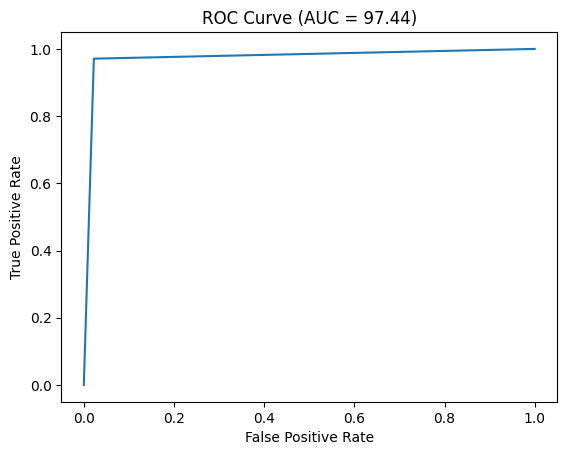

In [ ]:
print("Logistic Regression Classifier :\n")
# Accuracy
print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_test, lr_y_pred_test)))
# Precision
print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_test, lr_y_pred_test)))
# Recall
print('\nRecall: {:.2f}\n'.format(100*recall_score(y_test, lr_y_pred_test)))
# F1 Score
print('\nF1: {:.2f}\n'.format(100*f1_score(y_test, lr_y_pred_test)))
#ROC and AUC
auc_score_test = (100*roc_auc_score(y_test, lr_y_pred_test))


print('\nAUC score: {:.2f}'.format(auc_score_test))

print(classification_report(y_test, lr_y_pred_test))

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, lr_y_pred_test)
plt.plot(fpr_test, tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score_test))
plt.show()

Logistic Regression Classifier :


Accuracy: 98.90


Precision: 98.63


Recall: 99.65


F1: 99.14


AUC score: 98.63
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       167
           1       0.99      1.00      0.99       288

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455



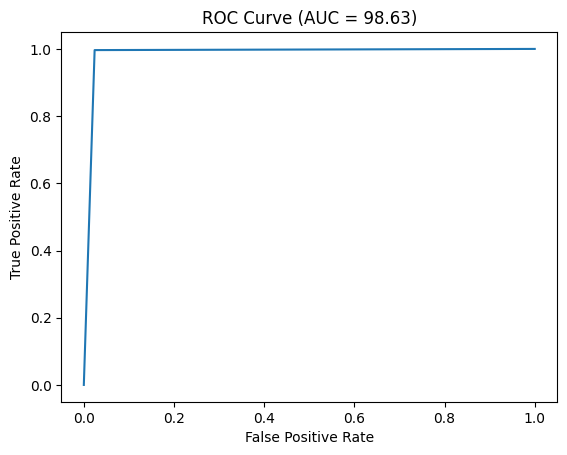

In [ ]:
print("Logistic Regression Classifier :\n")
# Accuracy
print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_train, lr_y_pred_train)))
# Precision
print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_train, lr_y_pred_train)))
# Recall
print('\nRecall: {:.2f}\n'.format(100*recall_score(y_train, lr_y_pred_train)))
# F1 Score
print('\nF1: {:.2f}\n'.format(100*f1_score(y_train, lr_y_pred_train)))
#ROC and AUC
auc_score_train = (100*roc_auc_score(y_train, lr_y_pred_train))

print('\nAUC score: {:.2f}'.format(auc_score_train))

print(classification_report(y_train, lr_y_pred_train))

fpr_train, tpr_train, thresholds_trian = roc_curve(y_train, lr_y_pred_train)
plt.plot(fpr_train, tpr_train)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score_train))
plt.show()

GridSearchCV

In [ ]:
#GridSearchCV to tune the hyperparameters of classifiers
lr_param_grid = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg']
}
# Define the hyperparameters to be tuned
# Create an instance of the GridSearchCV class and fit it to the training data
lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='newton-cg'),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['newton-cg']},
             scoring='accuracy')

In [ ]:

# Print out the best hyperparameters and the corresponding score
print("Best hyperparameters: ", lr_grid_search.best_params_)
print("Best score:", lr_grid_search.best_score_)

# Print out the classification report for the best model
lr_y_pred = lr_grid_search.predict(X_test)
print(classification_report(y_test, lr_y_pred))

Best hyperparameters:  {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score: 0.9780219780219781
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.99      0.97      0.98        69

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### **DecisionTreeClassifier**

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#calling the function
dt = DecisionTreeClassifier();

In [ ]:
#fit function
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#predict and test functions
dt_y_pred_test=dt.predict(X_test)
dt_y_pred_train=dt.predict(X_train)

In [ ]:
cm1= confusion_matrix(y_test,dt_y_pred_test)
cm1= confusion_matrix(y_train,dt_y_pred_train)

confusion_matrix(y_test, dt_y_pred_test)
#confusion_matrix(y_train, y_pred2_train)


array([[44,  1],
       [ 6, 63]])

Decision Tree Classifier:


Accuracy: 93.86


Precision: 98.44


Recall: 91.30


F1: 94.74


AUC score: 94.54
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        45
           1       0.98      0.91      0.95        69

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



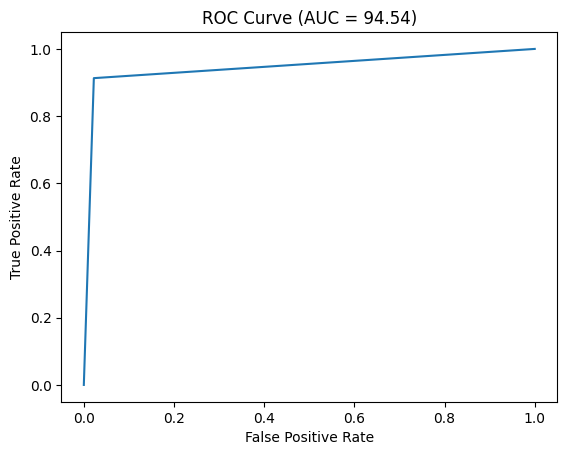

In [ ]:
print("Decision Tree Classifier:\n")
# Accuracy
print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_test, dt_y_pred_test)))
# Precision
print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_test, dt_y_pred_test)))
# Recall
print('\nRecall: {:.2f}\n'.format(100*recall_score(y_test, dt_y_pred_test)))
# F1 Score
print('\nF1: {:.2f}\n'.format(100*f1_score(y_test, dt_y_pred_test)))
#ROC and AUC
auc_score_test1 = (100*roc_auc_score(y_test, dt_y_pred_test))

print('\nAUC score: {:.2f}'.format(auc_score_test1))

print(classification_report(y_test, dt_y_pred_test))
fpr_test1, tpr_test1, thresholds_test1 = roc_curve(y_test, dt_y_pred_test)
plt.plot(fpr_test1, tpr_test1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score_test1))
plt.show()



Decision Tree Classifier:


Accuracy: 100.00


Precision: 100.00


Recall: 100.00


F1: 100.00


AUC score: 100.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       288

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



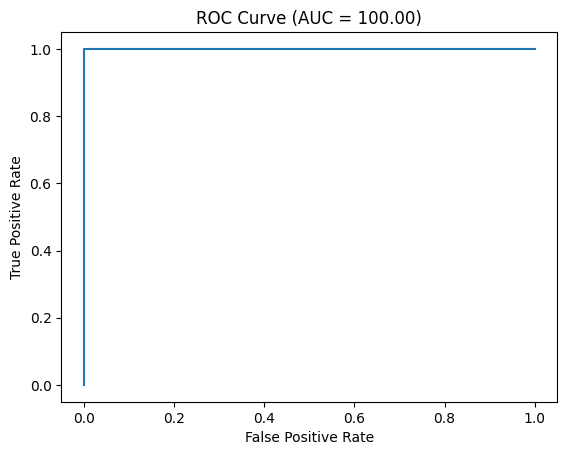

In [ ]:
print("Decision Tree Classifier:\n")
# Accuracy
print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_train, dt_y_pred_train)))
# Precision
print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_train, dt_y_pred_train)))
# Recall
print('\nRecall: {:.2f}\n'.format(100*recall_score(y_train, dt_y_pred_train)))
# F1 score
print('\nF1: {:.2f}\n'.format(100*f1_score(y_train, dt_y_pred_train)))
#ROC and AUC
auc_score_train1 = (100*roc_auc_score(y_train, dt_y_pred_train))

print('\nAUC score: {:.2f}'.format(auc_score_train1))

print(classification_report(y_train, dt_y_pred_train))

fpr_train1, tpr_train1, thresholds_trian1 = roc_curve(y_train, dt_y_pred_train)
plt.plot(fpr_train1, tpr_train1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score_train1))
plt.show()

GridSearchCV

In [ ]:
#GridSearchCV to tune the hyperparameters of classifiers
# Define the hyperparameters to be tuned
dt_param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create an instance of the GridSearchCV class and fit it to the training data
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:

# Print out the best hyperparameters and the corresponding score
print("Best hyperparameters: ", dt_grid_search.best_params_)
print("Best score:", dt_grid_search.best_score_)

# Print out the classification report for the best model
dt_y_pred = dt_grid_search.predict(X_test)
print(classification_report(y_test, dt_y_pred))

Best hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.9384615384615385
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        45
           1       0.97      0.90      0.93        69

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



### **Random** **Forest** **Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_y_pred_test=rfc.predict(X_test)
rfc_y_pred_train=rfc.predict(X_train)

confusion_matrix(y_test, rfc_y_pred_test)
#confusion_matrix(y_train, y_pred2_train)

array([[42,  3],
       [ 4, 65]])

Random Forest Classifier:


Accuracy: 93.86


Precision: 95.59


Recall: 94.20


F1: 94.89


AUC score: 93.77
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.96      0.94      0.95        69

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



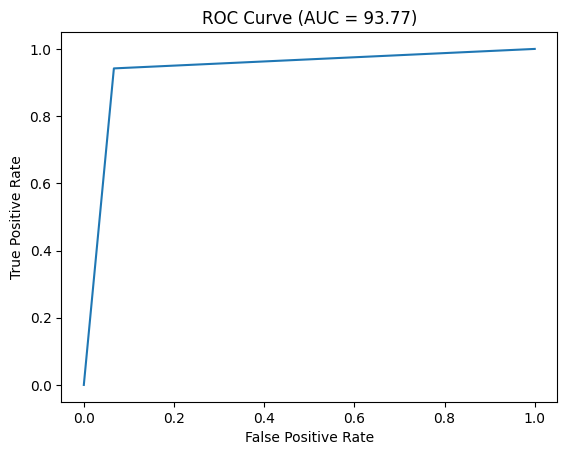

In [ ]:
print("Random Forest Classifier:\n")
# Accuracy
print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_test, rfc_y_pred_test)))
# Precision
print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_test, rfc_y_pred_test)))
# Recall
print('\nRecall: {:.2f}\n'.format(100*recall_score(y_test, rfc_y_pred_test)))
# F1 score
print('\nF1: {:.2f}\n'.format(100*f1_score(y_test, rfc_y_pred_test)))
#ROC and AUC
auc_score_test2 = (100*roc_auc_score(y_test, rfc_y_pred_test))

print('\nAUC score: {:.2f}'.format(auc_score_test2))

print(classification_report(y_test, rfc_y_pred_test))


fpr_test2, tpr_test2, thresholds_test2 = roc_curve(y_test, rfc_y_pred_test)
plt.plot(fpr_test2, tpr_test2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score_test2))
plt.show()

Random Forest Classifier:


Accuracy: 100.00


Precision: 100.00


Recall: 100.00


F1: 100.00


AUC score: 100.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       288

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



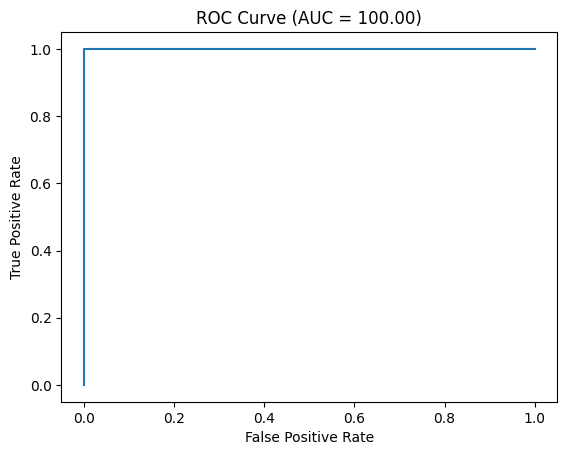

In [ ]:
print("Random Forest Classifier:\n")

# Accuracy
print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_train, rfc_y_pred_train)))
# Precision
print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_train, rfc_y_pred_train)))
# Recall
print('\nRecall: {:.2f}\n'.format(100*recall_score(y_train, rfc_y_pred_train)))
# F1 score
print('\nF1: {:.2f}\n'.format(100*f1_score(y_train, rfc_y_pred_train)))
#ROC and AUC
auc_score_train2 = (100*roc_auc_score(y_train, rfc_y_pred_train))

print('\nAUC score: {:.2f}'.format(auc_score_train2))
print(classification_report(y_train, rfc_y_pred_train))


fpr_train2, tpr_train2, thresholds_trian2 = roc_curve(y_train, rfc_y_pred_train)
plt.plot(fpr_train2, tpr_train2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score_train2))
plt.show()

GridSearchCV

In [ ]:
#GridSearchCV to tune the hyperparameters of classifiers
# Define the hyperparameters to be tuned
rfc_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create an instance of the GridSearchCV class and fit it to the training data
rfc_grid_search = GridSearchCV(rfc, rfc_param_grid, cv=5, scoring='accuracy')
rfc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:

# Print out the best hyperparameters and the corresponding score
print("Best hyperparameters: ", rfc_grid_search.best_params_)
print("Best score:", rfc_grid_search.best_score_)

# Print out the classification report for the best model
y_pred = rfc_grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9604395604395604
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.96      0.94      0.95        69

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



### **Support** **Vector** **Machines**

In [ ]:
from sklearn.svm import SVC
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
svc_y_pred_test=svc.predict(X_test)
svc_y_pred_train=svc.predict(X_train)

confusion_matrix(y_test, svc_y_pred_test)
#confusion_matrix(y_train, y_pred3_train)

array([[44,  1],
       [ 3, 66]])


Accuracy: 96.49


Precision: 98.51


Recall: 95.65


F1: 97.06


AUC score: 96.71
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.99      0.96      0.97        69

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



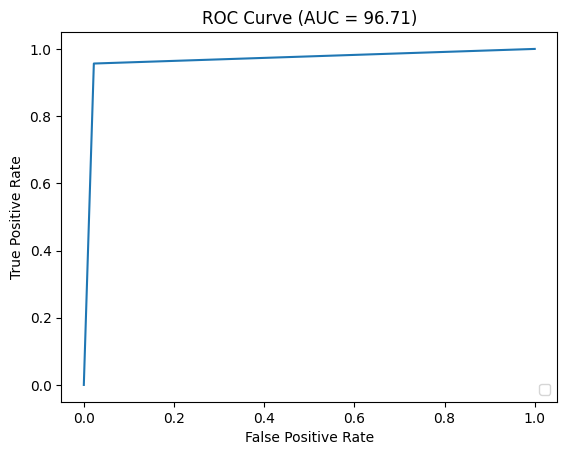

In [ ]:
# Accuracy
print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_test, svc_y_pred_test)))
# Precision
print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_test, svc_y_pred_test)))
# Recall
print('\nRecall: {:.2f}\n'.format(100*recall_score(y_test, svc_y_pred_test)))
# F1 score
print('\nF1: {:.2f}\n'.format(100*f1_score(y_test, svc_y_pred_test)))
#ROC and AUC
auc_score_test3 = (100*roc_auc_score(y_test, svc_y_pred_test))

print('\nAUC score: {:.2f}'.format(auc_score_test3))
print(classification_report(y_test, svc_y_pred_test))

fpr_test3, tpr_test3, thresholds_test3 = roc_curve(y_test, svc_y_pred_test)
plt.plot(fpr_test3, tpr_test3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score_test3))
plt.legend(loc = 4)
plt.show()


Accuracy: 98.68


Precision: 97.96


Recall: 100.00


F1: 98.97


AUC score: 98.20
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       167
           1       0.98      1.00      0.99       288

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



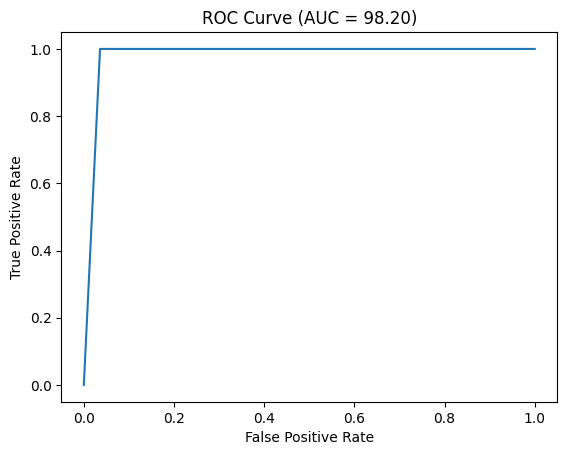

In [ ]:
# Accuracy
print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_train, svc_y_pred_train)))
# Precision
print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_train, svc_y_pred_train)))
# Recall
print('\nRecall: {:.2f}\n'.format(100*recall_score(y_train, svc_y_pred_train)))
# F1 score
print('\nF1: {:.2f}\n'.format(100*f1_score(y_train, svc_y_pred_train)))
#ROC and AUC
auc_score_train3 = (100*roc_auc_score(y_train, svc_y_pred_train))

print('\nAUC score: {:.2f}'.format(auc_score_train3))
print(classification_report(y_train, svc_y_pred_train))

fpr_train3, tpr_train3, thresholds_trian3 = roc_curve(y_train, svc_y_pred_train)
plt.plot(fpr_train3, tpr_train3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score_train3))
plt.show()

GridSearchCV

In [ ]:
#GridSearchCV to tune the hyperparameters of classifiers
# Define the hyperparameters to be tuned
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}
# Create an instance of the GridSearchCV class and fit it to the training data
svc_grid_search = GridSearchCV(svc, svc_param_grid, cv=5, scoring='accuracy')
svc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
# Print out the best hyperparameters and the corresponding score
print("Best hyperparameters: ", svc_grid_search.best_params_)
print("Best score:", svc_grid_search.best_score_)

# Print out the classification report for the best model
y_pred = svc_grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best hyperparameters:  {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.9802197802197803
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.97      1.00      0.99        69

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### **K-Nearest Neighbors Classifier**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [ ]:
knn_y_pred_test=knn.predict(X_test)
knn_y_pred_train=knn.predict(X_train)

confusion_matrix(y_test, knn_y_pred_test)

array([[41,  4],
       [ 0, 69]])


Accuracy: 96.49


Precision: 94.52


Recall: 100.00


F1: 97.18


AUC score: 95.56
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        45
           1       0.95      1.00      0.97        69

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



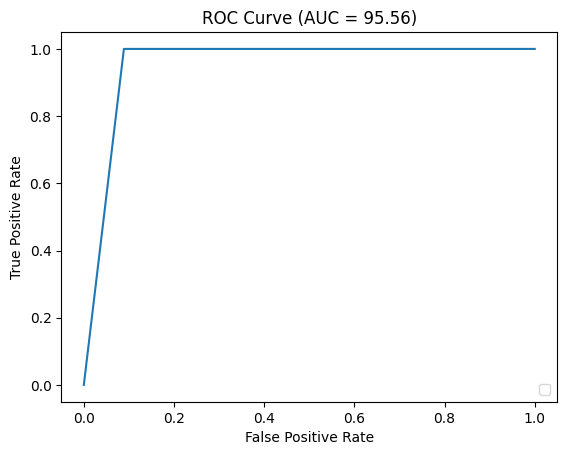

In [ ]:
# Accuracy
print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_test, knn_y_pred_test)))
# Precision
print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_test, knn_y_pred_test)))
# Recall
print('\nRecall: {:.2f}\n'.format(100*recall_score(y_test, knn_y_pred_test)))
# F1 score
print('\nF1: {:.2f}\n'.format(100*f1_score(y_test, knn_y_pred_test)))
#ROC and AUC
auc_score_test4 = (100*roc_auc_score(y_test, knn_y_pred_test))

print('\nAUC score: {:.2f}'.format(auc_score_test4))
print(classification_report(y_test, knn_y_pred_test))

fpr_test4, tpr_test4, thresholds_test4 = roc_curve(y_test, knn_y_pred_test)
plt.plot(fpr_test4, tpr_test4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score_test4))
plt.legend(loc = 4)
plt.show()


Accuracy: 95.38


Precision: 93.77


Recall: 99.31


F1: 96.46


AUC score: 93.96
              precision    recall  f1-score   support

           0       0.99      0.89      0.93       167
           1       0.94      0.99      0.96       288

    accuracy                           0.95       455
   macro avg       0.96      0.94      0.95       455
weighted avg       0.96      0.95      0.95       455



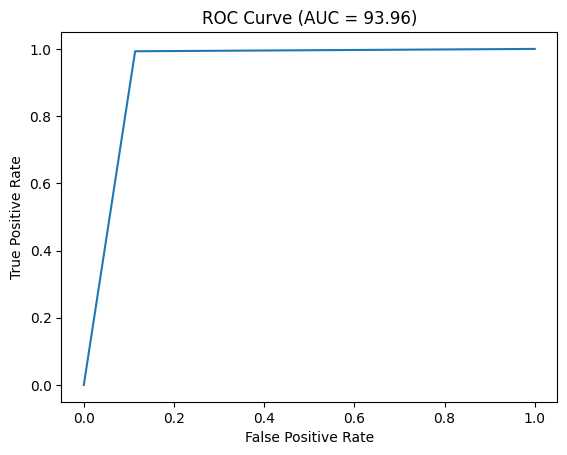

In [ ]:

# Accuracy
print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_train, knn_y_pred_train)))
# Precision
print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_train, knn_y_pred_train)))
# Recall
print('\nRecall: {:.2f}\n'.format(100*recall_score(y_train, knn_y_pred_train)))
# F1 score
print('\nF1: {:.2f}\n'.format(100*f1_score(y_train, knn_y_pred_train)))
#ROC and AUC
auc_score_train4 = (100*roc_auc_score(y_train, knn_y_pred_train))

print('\nAUC score: {:.2f}'.format(auc_score_train4))
print(classification_report(y_train, knn_y_pred_train))

fpr_train4, tpr_train4, thresholds_trian4 = roc_curve(y_train, knn_y_pred_train)
plt.plot(fpr_train4, tpr_train4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score_train4))
plt.show()

GridSearchCV

In [ ]:
#GridSearchCV to tune the hyperparameters of classifiers
# Define the hyperparameters to be tuned
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
# Create an instance of the GridSearchCV class and fit it to the training data
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=23),
             param_grid={'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:

# Print out the best hyperparameters and the corresponding score
print("Best hyperparameters: ", knn_grid_search.best_params_)
print("Best score:", knn_grid_search.best_score_)

# Print out the classification report for the best model
y_pred = knn_grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best hyperparameters:  {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best score: 0.9692307692307691
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.97      0.99      0.98        69

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### **Feature Selection:**


> Both methods select the most important features to classify tumors as malignant or benign
  Whereas, the first method is a simpler and faster method, and it chooses higher features based on a statistical test called the chi test, and it is used for large data sets and large numbers, as in our example.


> The second method is a more complex, time consuming and computationally expensive method by iteratively eliminating less important features based on the performance of the machine learning model.
In our opinion, the first method is mathematically better and faster in our example

In [ ]:
#Identify the 10 most important features to classify tumors as malignant or benign
#using SelectKBest and  chi-squared test:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = np.array(feature_names)[selector.get_support()]
print("Selected Features :\n", selected_features,"\n")

accuracy = accuracy_score(y_test, knn_y_pred_test)
print("Accuracy using SelectKBest and chi2 test:", accuracy)

Selected Features :
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area'] 

Accuracy using SelectKBest and chi2 test: 0.9649122807017544


In [ ]:
#using RFE and logistic regression:
from sklearn.feature_selection import RFE
selector = RFE(lr, n_features_to_select=10, step=1)
X_new = selector.fit_transform(X, y)
selected_features = np.array(feature_names)[selector.support_]
print("Selected Features:\n", selected_features , "\n")

accuracy = accuracy_score(y_test, knn_y_pred_test)
print("Accuracy using RFE and logistic regression:", accuracy)

Selected Features:
 ['mean radius' 'mean compactness' 'mean concavity' 'texture error'
 'worst radius' 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry'] 

Accuracy using RFE and logistic regression: 0.9649122807017544


### **Based on the results we conducted during the test, we can see that SVM has the highest accuracy, precision, recall, F1 and ROC Curve and AUC Score , followed by logistic regression. Therefore, in this particular case, SVM is the best performing algorithm for the breast cancer dataset.**

> **Logistic Regression Classifier:**
Accuracy: 97.37, Precision: 98.53, Recall: 97.10, F1 score: 97.81, ROC AUC score: 97.44

> **Decision Tree Classifier:**
Accuracy: 93.86, Precision: 98.44, Recall:  91.30, F1 score: 94.74, ROC AUC score: 94.54

> **Random Forest Classifier:**
Accuracy:  93.86, Precision:95.59, Recall: 94.20, F1 score: 94.89, ROC AUC score:  93.77

> **SVM Classifier:**
Accuracy:  96.49, Precision: 98.51, Recall:  95.65, F1 score: 97.06, ROC AUC score: 96.71

> **K-Nearest Neighbors Classifier:**
Accuracy: 96.49, Precision:  94.52, Recall: 100.00, F1 score: 97.18, ROC AUC score: 95.56

### Summary

**we loaded the Breast Cancer Wisconsin dataset, cleaned the data, and created visualizations to better understand the relationships between the variables. We also performed classification using different algorithms, evaluated their performance using various metrics, tuned their hyperparameters, and selected the most important features for classification. Finally, we compared the performance of the classifiers and identified the best performing algorithm. Based on the evaluation metrics, we can conclude that the SVM performed the best for our task**